In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = './Train'
valid_path = './Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('./Train/*')

In [7]:
# our layers - can be added more if we want
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
# Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('./Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 31367 images belonging to 43 classes.


In [16]:
test_set = test_datagen.flow_from_directory('./Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7842 images belonging to 43 classes.


In [17]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 3,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\Users\jainn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
981/981 [==============================] - 6873s 7s/step - loss: 1.8461 - accuracy: 0.5241 - val_loss: 1.3522 - val_accuracy: 0.6261
Epoch 2/3
981/981 [==============================] - 6757s 7s/step - loss: 0.6472 - accuracy: 0.8095 - val_loss: 1.2545 - val_accuracy: 0.6688
Epoch 3/3
981/981 [==============================] - 8008s 8s/step - loss: 0.4987 - accuracy: 0.8482 - val_loss: 1.1973 - val_accuracy: 0.6979


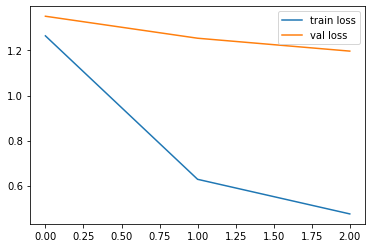

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

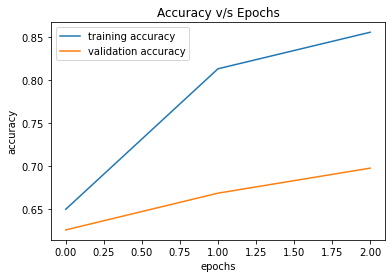

In [31]:

plt.figure(0)
plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [32]:
import tensorflow as tf

In [33]:
from keras.models import load_model

In [34]:
model.save('vgg16_epoch3.h5')